<a href="https://colab.research.google.com/github/JustMatthew989/Matvey_Mokritskikh_Repo/blob/main/%D0%94%D0%97_2_%D0%9C%D0%BE%D0%BA%D1%80%D0%B8%D1%86%D0%BA%D0%B8%D1%85_%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D1%8F_1_%D0%B8_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#ДОМАШНЕЕ ЗАДАНИЕ №2.

In [ ]:
#ЗАДАНИЕ 1.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install ucimlrepo

In [ ]:
# Загрузка данных
data = pd.read_csv('student-mat.csv', sep=';')
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


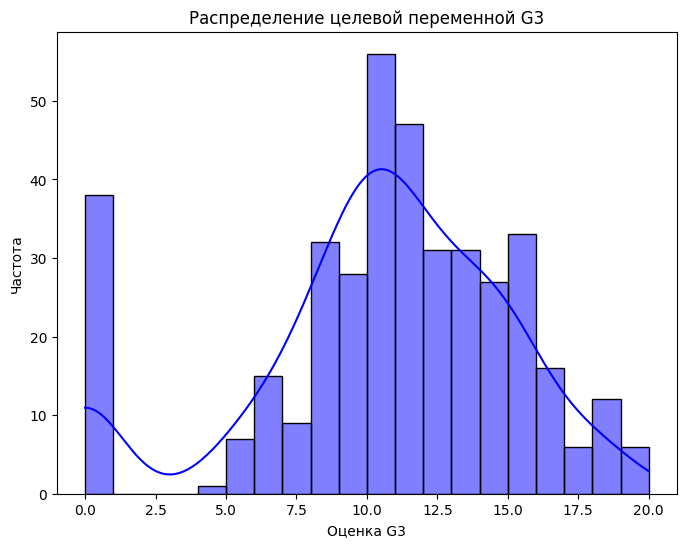

In [ ]:
# График распределения данных
plt.figure(figsize=(8, 6))
sns.histplot(data['G3'], kde=True, bins=20, color='blue')
plt.title('Распределение целевой переменной G3')
plt.xlabel('Оценка G3')
plt.ylabel('Частота')
plt.savefig("distribution_G3.png")  # Сохранение графика
plt.show()

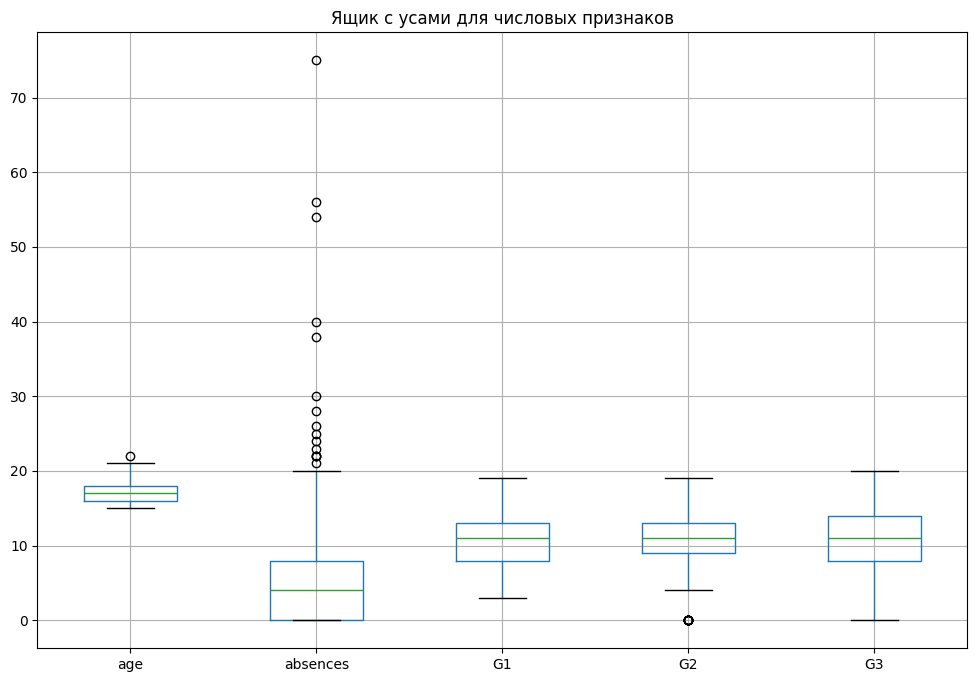

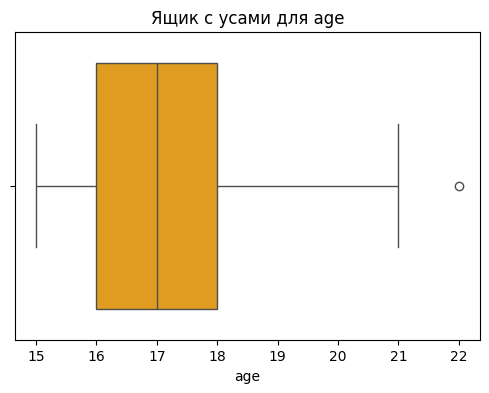

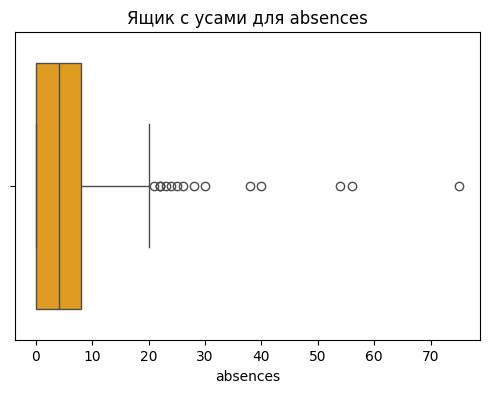

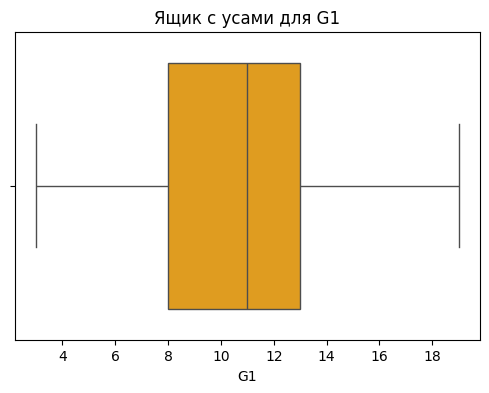

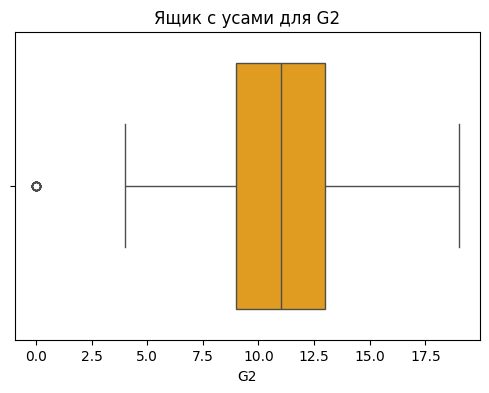

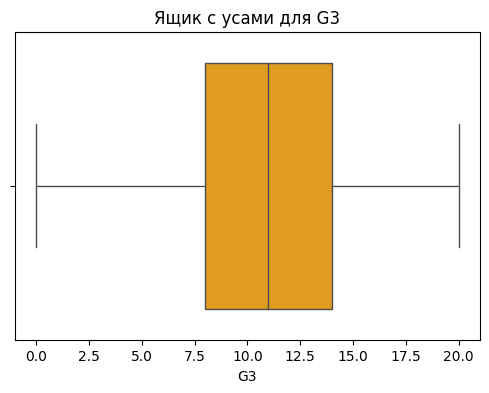

In [ ]:
# Ящик с усами
num_features = ['age', 'absences', 'G1', 'G2', 'G3']
plt.figure(figsize=(12, 8))
data[num_features].boxplot()
plt.title('Ящик с усами для числовых признаков')
plt.savefig("boxplot_numerical_features.png")  # Сохранение графика
plt.show()
for feature in num_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=data[feature], color='orange')
    plt.title(f'Ящик с усами для {feature}')
    plt.savefig(f"boxplot_{feature}.png")  # Сохранение графика
    plt.show()

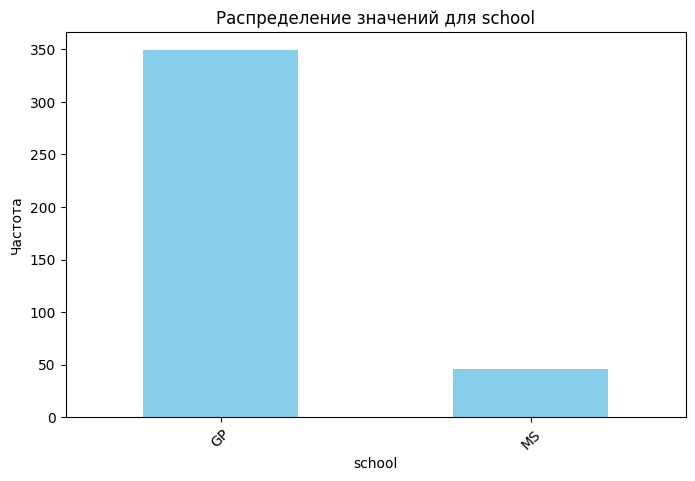

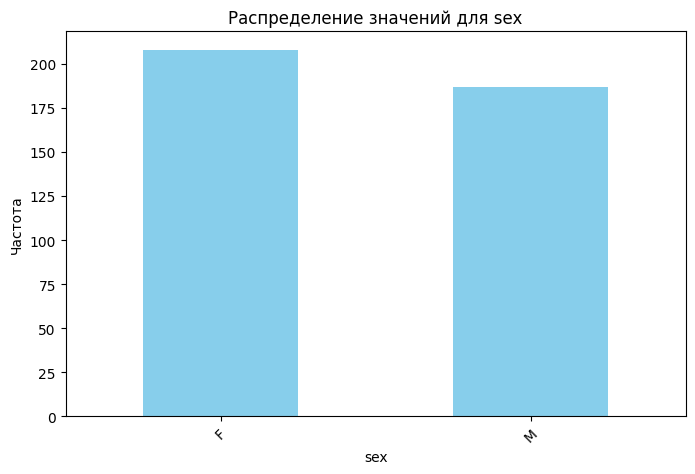

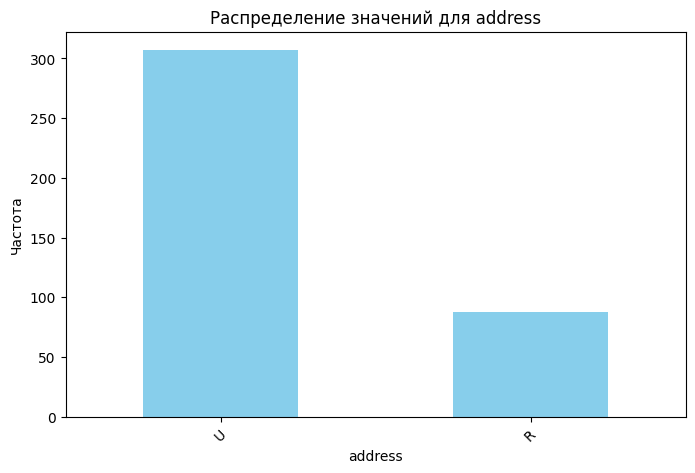

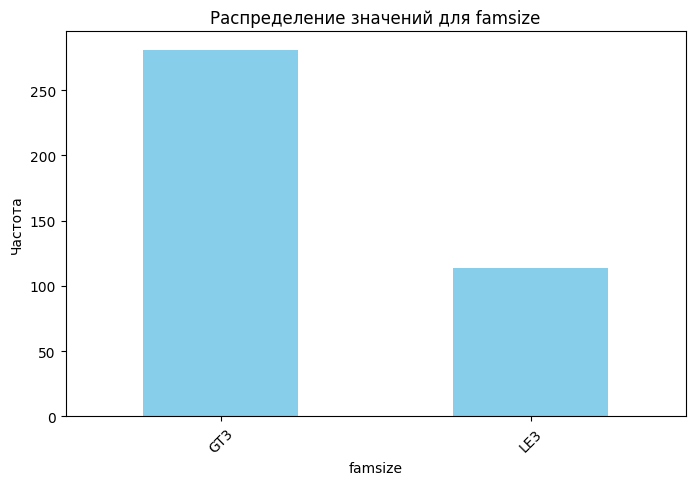

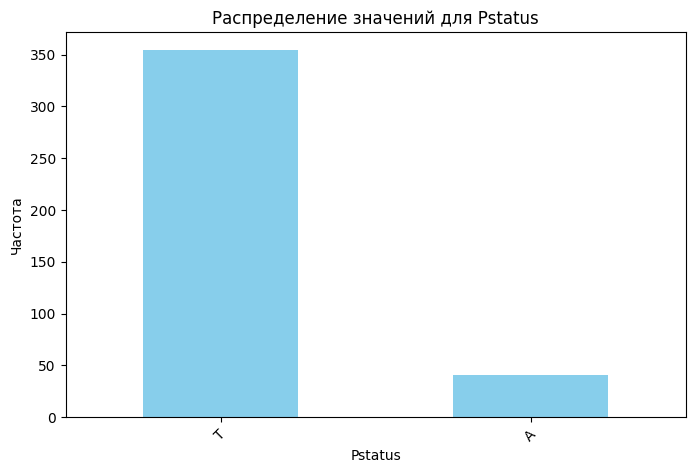

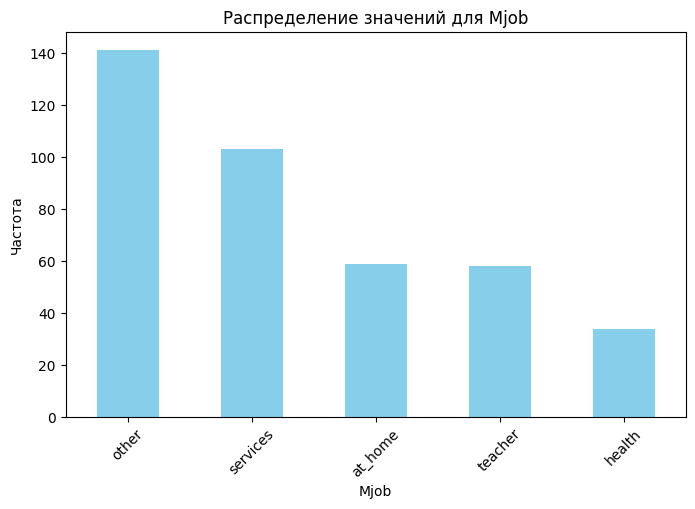

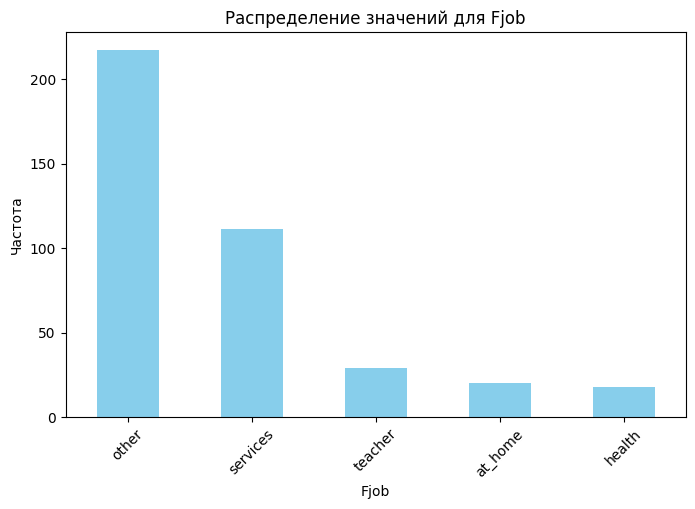

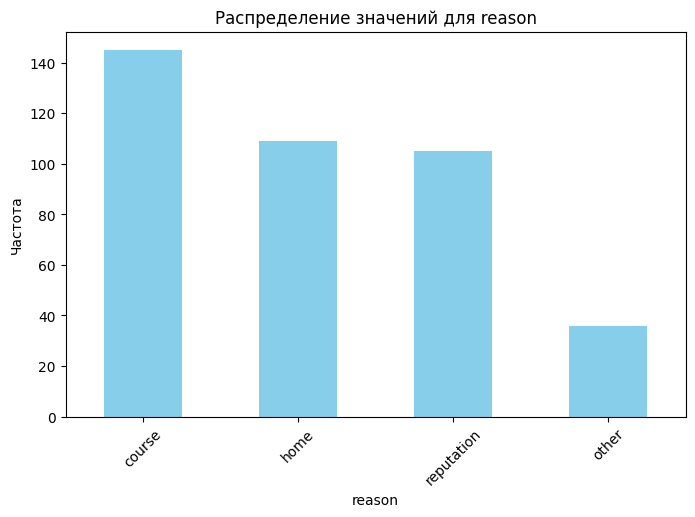

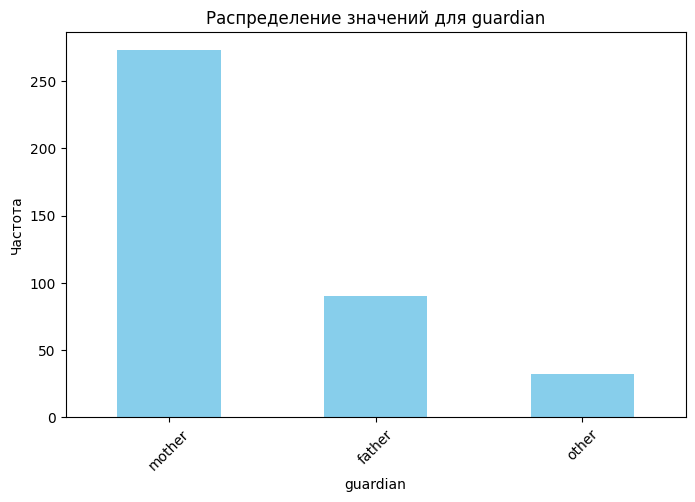

In [ ]:
# Диаграма распределения для текстовых признаков
cat_features = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian']
for feature in cat_features:
    plt.figure(figsize=(8, 5))
    data[feature].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Распределение значений для {feature}')
    plt.xlabel(feature)
    plt.ylabel('Частота')
    plt.xticks(rotation=45)
    plt.savefig(f"distribution_{feature}.png")  # Сохранение графика
    plt.show()

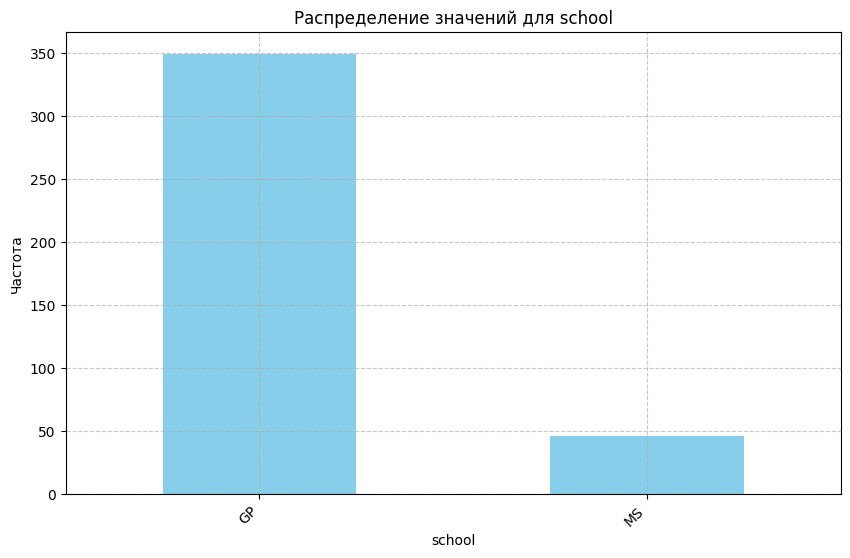

Наблюдается дисбаланс в school: 'GP' составляет 349 наблюдений (88.35%).


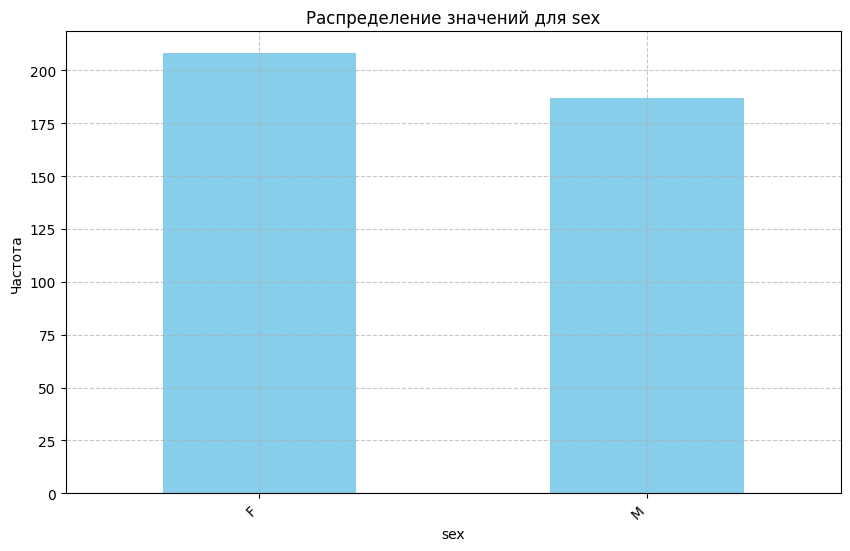

Наблюдается дисбаланс в sex: 'F' составляет 208 наблюдений (52.66%).


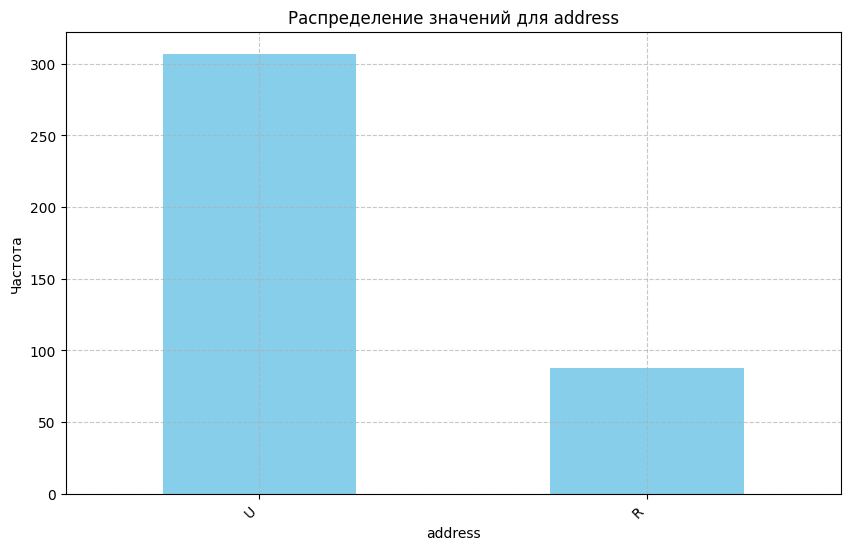

Наблюдается дисбаланс в address: 'U' составляет 307 наблюдений (77.72%).


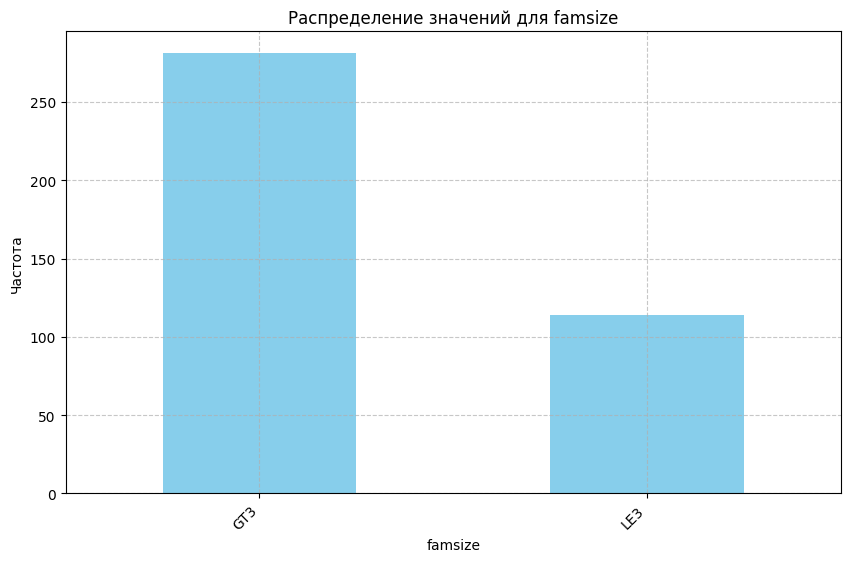

Наблюдается дисбаланс в famsize: 'GT3' составляет 281 наблюдений (71.14%).


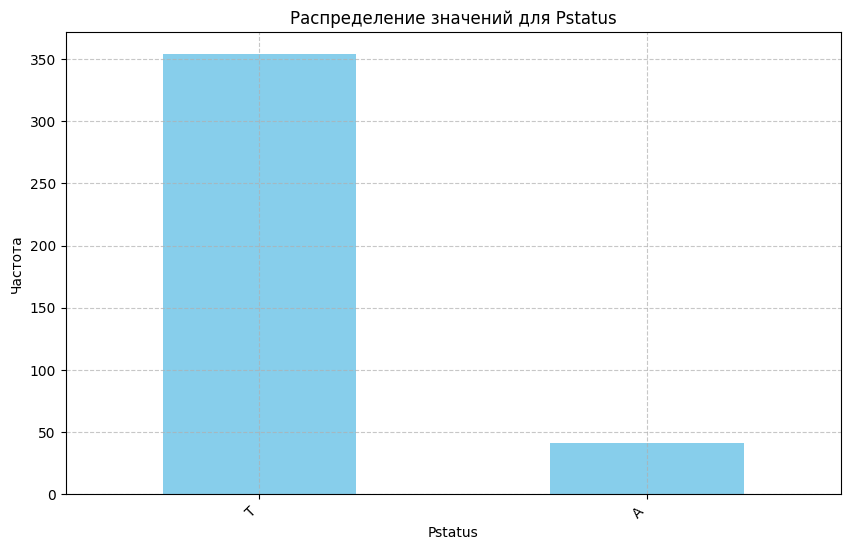

Наблюдается дисбаланс в Pstatus: 'T' составляет 354 наблюдений (89.62%).


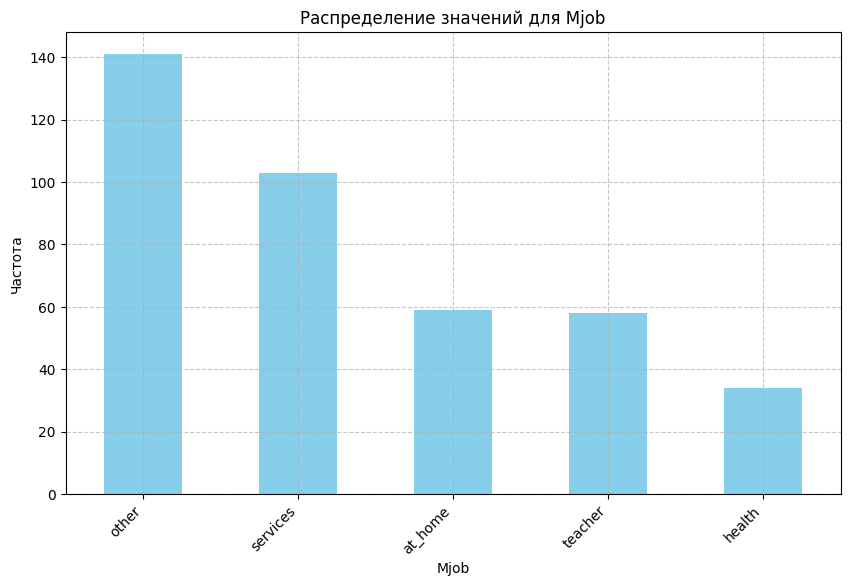

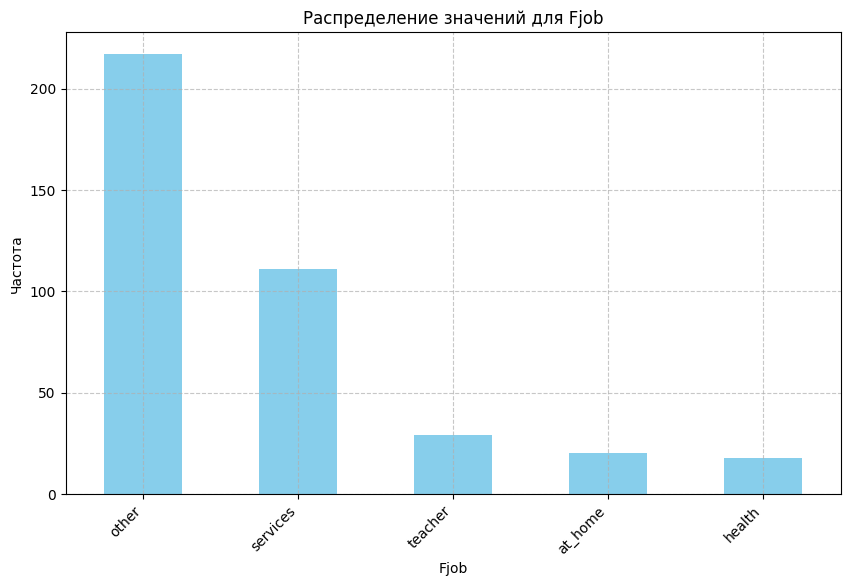

Наблюдается дисбаланс в Fjob: 'other' составляет 217 наблюдений (54.94%).


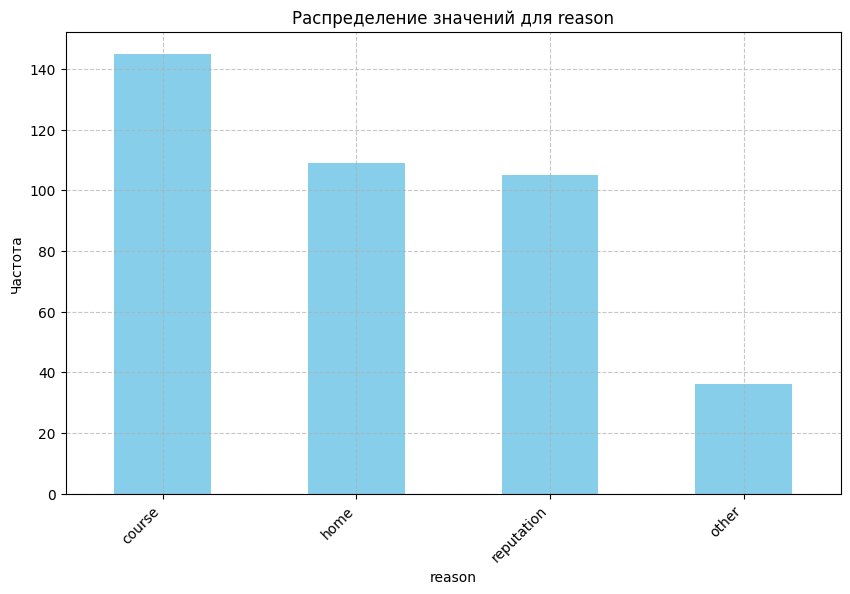

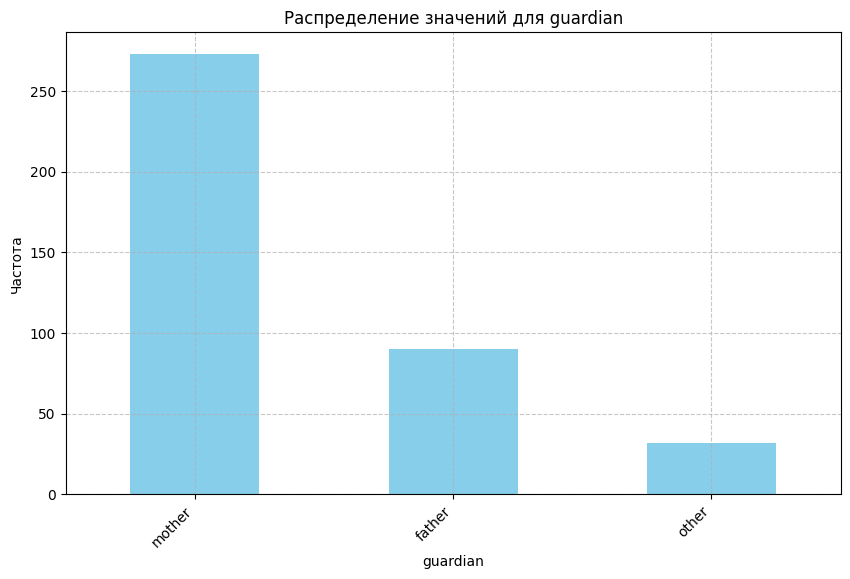

Наблюдается дисбаланс в guardian: 'mother' составляет 273 наблюдений (69.11%).


In [ ]:
#  Доп. анализ данных для зафиксированных признаков
text_columns = ['school', 'sex', 'address', 'famsize', 'Pstatus',
                'Mjob', 'Fjob', 'reason', 'guardian']
for column in text_columns:
    plt.figure(figsize=(10, 6))
    value_counts = data[column].value_counts()  # Подсчет количества значений
    value_counts.plot(kind='bar', color='skyblue')
    plt.title(f'Распределение значений для {column}')
    plt.xlabel(column)
    plt.ylabel('Частота')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.savefig(f'{column}_distribution.png')  # Сохранение графика
    plt.show()
    # Проверка на дисбаланс
    if (value_counts.max() / value_counts.sum()) > 0.5:  # Если одно значение > 50%
        print(f"Наблюдается дисбаланс в {column}: "
              f"'{value_counts.idxmax()}' составляет {value_counts.max()} наблюдений "
              f"({(value_counts.max() / value_counts.sum() * 100):.2f}%).")

In [ ]:
# ЗАДАНИЕ 2.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
from io import StringIO

In [ ]:
# Загружаю данные
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
r = requests.get(url)
csv_data = r.text
df1 = pd.read_csv(StringIO(csv_data), header=None, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])
df1['class'] = df1['class'].apply(lambda x: 0 if x == 'Iris-setosa' else 1)

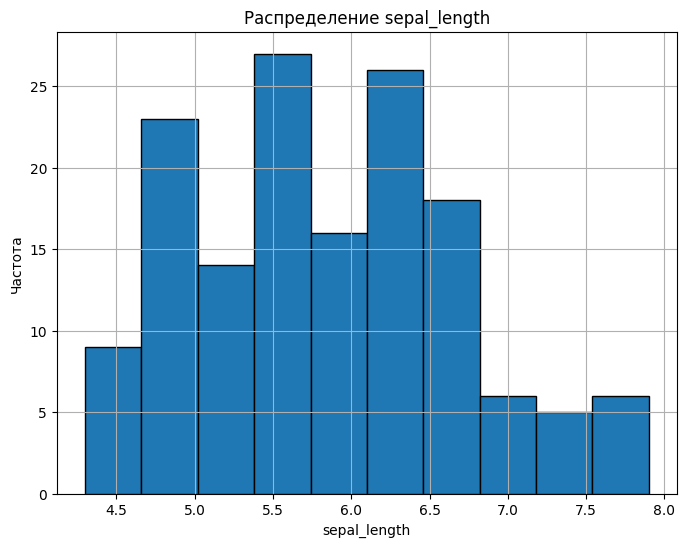

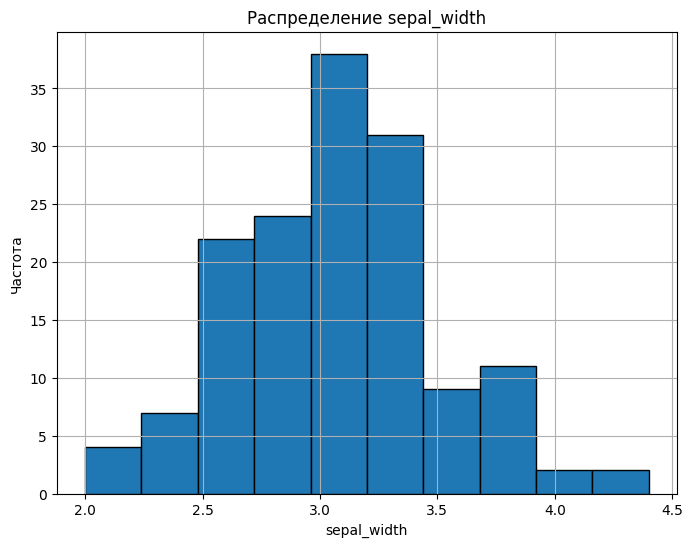

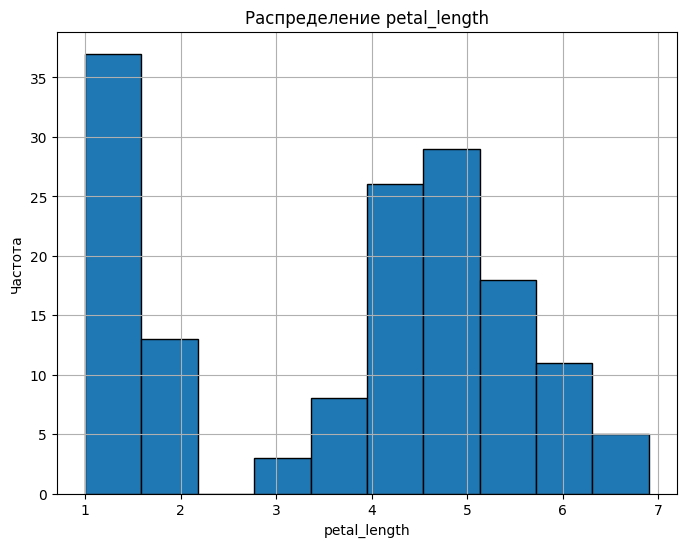

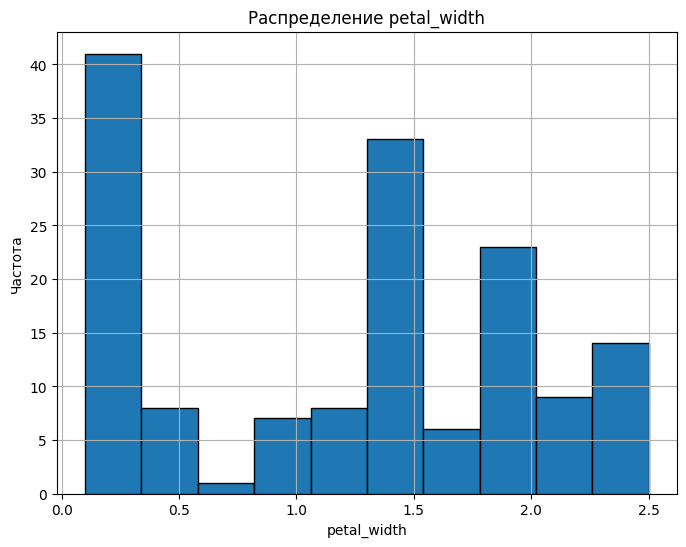

In [ ]:
# График распределения данных
numerical_features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    plt.hist(df1[feature], bins=10, edgecolor='black')
    plt.title(f'Распределение {feature}')
    plt.xlabel(feature)
    plt.ylabel('Частота')
    plt.grid(True)
    plt.savefig(f'iris_{feature}_histogram.png')
    plt.show()

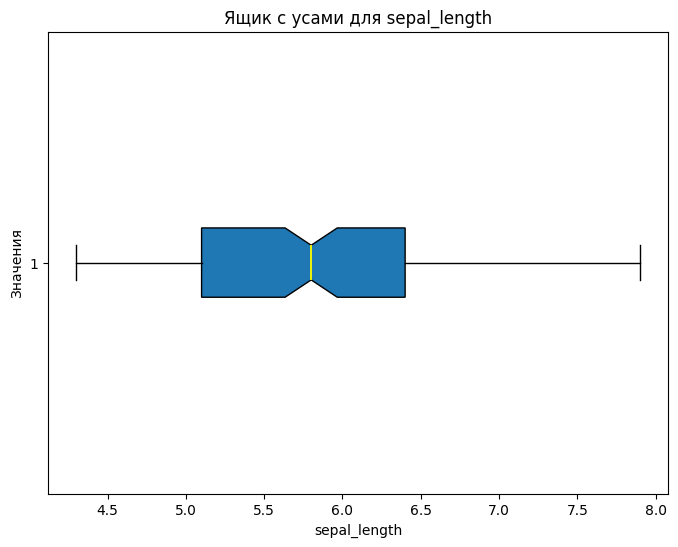

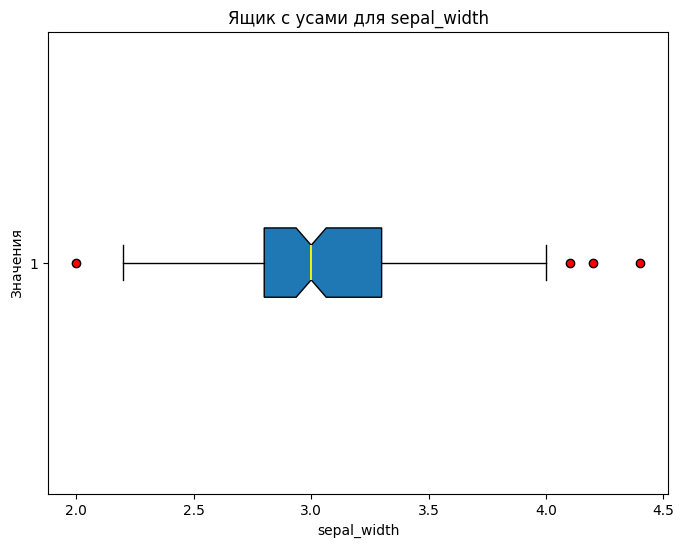

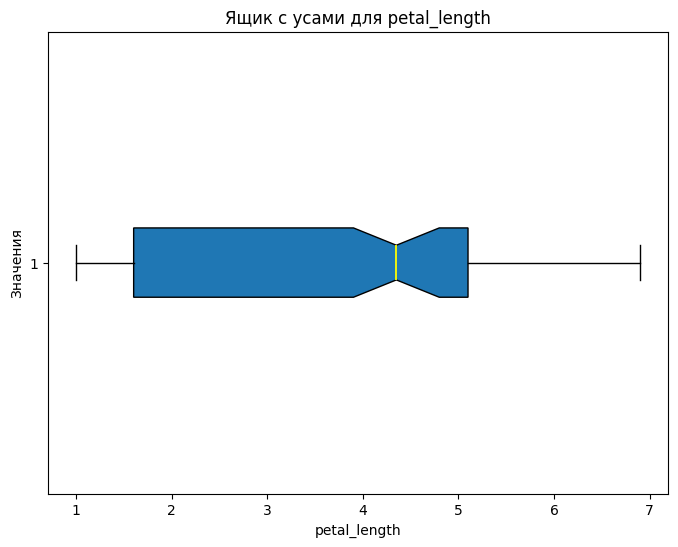

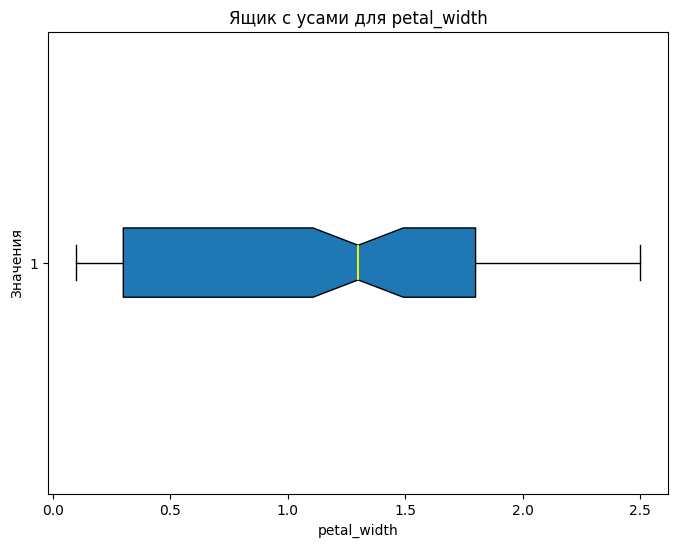

In [ ]:
# Ящик с усами для числовых признаков
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    plt.boxplot(df1[feature], patch_artist=True, notch=True, vert=False,
                medianprops={'color': 'yellow', 'linewidth': 1.3},
                whis=1.5, flierprops={'marker': 'o', 'markerfacecolor': 'red'})
    plt.title(f'Ящик с усами для {feature}')
    plt.xlabel(feature)
    plt.ylabel('Значения')
    plt.savefig(f'iris_{feature}_boxplot.png')
    plt.show()

In [ ]:
# Диаграма распределения для текстовых признаков (пропускаю, т.к. нет текстовых после обработки)

In [ ]:
# Дополнительный график для выбросов (определяю выбросы и строю гистограммы)
outliers_features = []
for feature in numerical_features:
    Q1 = df1[feature].quantile(0.25)
    Q3 = df1[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df1[(df1[feature] < lower_bound) | (df1[feature] > upper_bound)]
    if not outliers.empty:
        outliers_features.append(feature)
        print(f"Признак {feature} имеет выбросы.")

Признак sepal_width имеет выбросы.


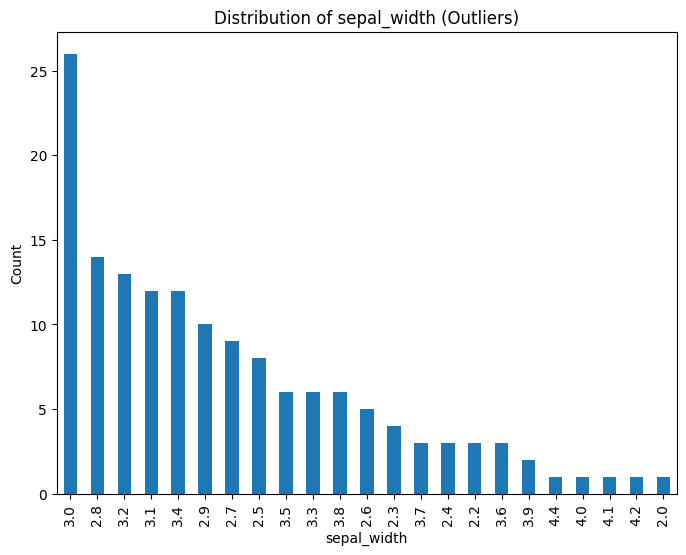

In [ ]:
for feature in outliers_features:
    plt.figure(figsize=(8, 6))
    df1[feature].value_counts().plot(kind='bar', title=f"Distribution of {feature} (Outliers)")
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.savefig(f'iris_{feature}_outliers_counts.png')
    plt.show()

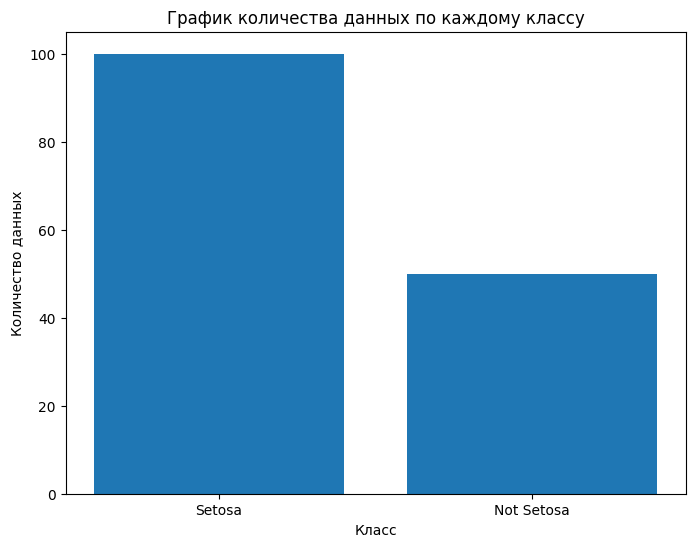

In [ ]:
# График количества данных по каждому классу для целевой переменной
target_variable = 'class'
class_counts = df1[target_variable].value_counts()
class_names = ['Setosa', 'Not Setosa']

plt.figure(figsize=(8, 6))
plt.bar(class_names, class_counts)
plt.xlabel('Класс')
plt.ylabel('Количество данных')
plt.title('График количества данных по каждому классу')
plt.savefig('iris_target_distribution.png')
plt.show()